<a href="https://colab.research.google.com/github/Akshayaa18S/GRADIENT-DESCENT/blob/main/Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results:
Best slope (Linear Search)   : 2.7879, Loss: 1.0140, Time: 0.000070 sec
Best slope (Gradient Descent): 3.3865, Loss: 6.6217, Time: 0.014473 sec


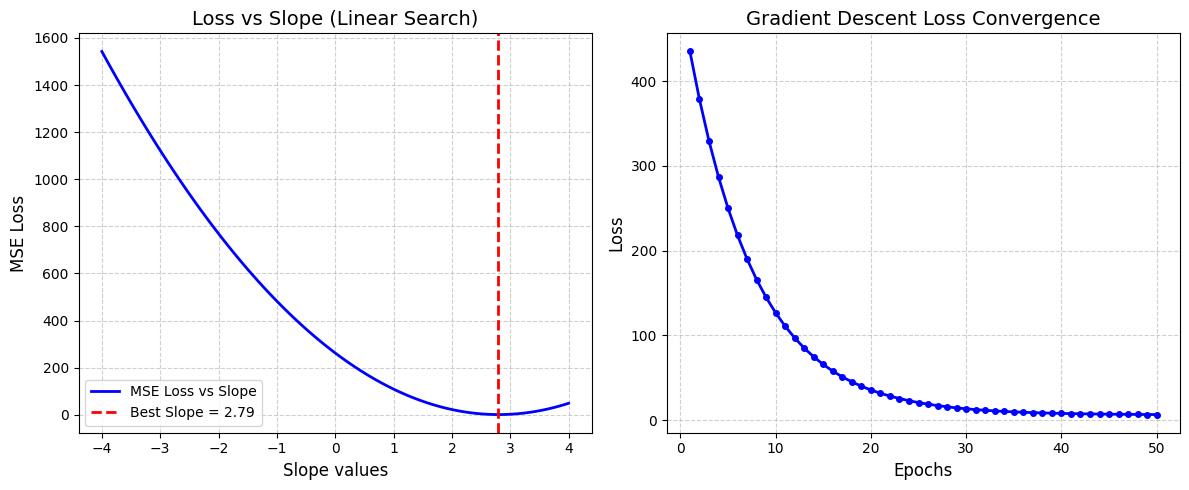

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_data():
    """
    Generates synthetic linear data with noise.
    Returns:
        x (numpy array): Independent variable values.
        y (numpy array): Dependent variable values with noise.
        true_intercept (float): Actual intercept value.
    """
    np.random.seed(40)
    x = np.linspace(0, 10, 50000)
    true_slope, true_intercept = 2.8, 5.2
    noise = np.random.normal(0, 1, size=len(x))
    y = true_slope * x + true_intercept + noise
    return x, y, true_intercept

def mse_loss(predicted_slope, intercept, x_values, y_values):
    """
    Computes Mean Squared Error (MSE) between predicted and actual values.
    Args:
        predicted_slope (float): Slope value being tested.
        intercept (float): Fixed intercept value.
        x_values (numpy array): Independent variable values.
        y_values (numpy array): Actual dependent variable values.
    Returns:
        float: Mean Squared Error.
    """
    predictions = predicted_slope * x_values + intercept
    return np.mean((y_values - predictions) ** 2)

def linear_search_best_slope(x, y, intercept):
    """
    Performs a brute-force linear search to find the best slope that minimizes MSE.
    Args:
        x (numpy array): Independent variable values.
        y (numpy array): Dependent variable values.
        intercept (float): Fixed intercept value.
    Returns:
        best_slope (float): Best slope value found.
        min_loss (float): Minimum loss (MSE) found.
        elapsed_time (float): Execution time for linear search.
        slope_range (numpy array): Range of slopes tested.
        loss_values (list): MSE values corresponding to slope_range.
    """
    slope_range = np.linspace(-4, 4, 100)
    loss_values = [mse_loss(m, intercept, x, y) for m in slope_range]
    start_time = time.time()
    best_slope = slope_range[np.argmin(loss_values)]
    min_loss = min(loss_values)
    elapsed_time = time.time() - start_time
    return best_slope, min_loss, elapsed_time, slope_range, loss_values

def gradient_descent(x, y, learning_rate=0.001, epochs=50):
    """
    Performs gradient descent to find the optimal slope and intercept.
    Args:
        x (numpy array): Independent variable values.
        y (numpy array): Dependent variable values.
        learning_rate (float): Step size for gradient updates.
        epochs (int): Number of iterations for optimization.
    Returns:
        best_slope (float): Best slope value found.
        best_intercept (float): Best intercept value found.
        loss_history (list): List of loss values over iterations.
        final_loss (float): Final loss after training.
        elapsed_time (float): Execution time for gradient descent.
    """
    m, b = 0.0, 0.0
    loss_history = []
    start_time = time.time()
    for epoch in range(epochs):
        y_pred = m * x + b
        error = y_pred - y
        mse_loss = np.mean(error ** 2)
        loss_history.append(mse_loss)
        m_gradient = (2 / len(x)) * np.sum(error * x)
        b_gradient = (2 / len(x)) * np.sum(error)
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
    elapsed_time = time.time() - start_time
    return m, b, loss_history, mse_loss, elapsed_time

def plot_results(slope_range, loss_values, best_slope_linear, loss_history_simulated):
    """
    Plots results of the linear search and gradient descent loss convergence.
    Args:
        slope_range (numpy array): Range of slopes tested.
        loss_values (list): MSE values corresponding to slope_range.
        best_slope_linear (float): Best slope found in linear search.
        loss_history_simulated (list): Simulated loss values over epochs.
    """
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(slope_range, loss_values, label="MSE Loss vs Slope", color="blue", linewidth=2)
    plt.axvline(best_slope_linear, linestyle="--", color="red", label=f"Best Slope = {best_slope_linear:.2f}", linewidth=2)
    plt.xlabel("Slope values", fontsize=12)
    plt.ylabel("MSE Loss", fontsize=12)
    plt.title("Loss vs Slope (Linear Search)", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(loss_history_simulated) + 1), loss_history_simulated, marker="o", color="blue", linestyle="-", markersize=4, linewidth=2)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title("Gradient Descent Loss Convergence", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

def main():
    """
    Main function to execute the linear regression optimization.
    It performs both linear search and gradient descent, then prints and plots results.
    """
    x, y, true_intercept = generate_data()
    best_slope_linear, min_loss_linear, time_linear, slope_range, loss_values = linear_search_best_slope(x, y, true_intercept)
    best_slope_gd, best_intercept_gd, loss_history_simulated, min_loss_gd, time_gd = gradient_descent(x, y, learning_rate=0.001, epochs=50)
    print("Results:")
    print(f"Best slope (Linear Search)   : {best_slope_linear:.4f}, Loss: {min_loss_linear:.4f}, Time: {time_linear:.6f} sec")
    print(f"Best slope (Gradient Descent): {best_slope_gd:.4f}, Loss: {min_loss_gd:.4f}, Time: {time_gd:.6f} sec")
    plot_results(slope_range, loss_values, best_slope_linear, loss_history_simulated)

if __name__ == "__main__":
    main()
